## GPU performance for fashion mnist dataset
we are going to do image classification for fashion mnist dataset and then we will benchmark the performance of GPU vs CPU for 1 hidden layer and then for 5 hidden layers. we will eventually fill out this table with your performance benchmark numbers

| Hidden Layer               | CPU      | GPU |
|------------------|-----------|-------|
| 1 | ?     | 0.?  |
| 5 | ?      | ?  |



In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [22]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


In [6]:
test_label[0]

9

In [7]:
classes[train_label[0]]

'Ankle boot'

In [8]:
def images(idx):
    plt.figure(figsize=(10,1))
    plt.imshow(train_image[idx])
    plt.axis('off')

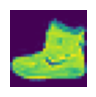

In [9]:
images(0)

In [10]:
#scalling
train_image_scalled = train_image/255
test_image_scalled = test_image/255

In [11]:
test_image_scalled.shape

(10000, 28, 28)

In [12]:
#categorical encoding
train_label_categorical = keras.utils.to_categorical(
    train_label, num_classes=10, dtype='int'
)
test_label_categorical = keras.utils.to_categorical(
    test_label, num_classes=10, dtype='int'
)
print(test_label_categorical[0])
print(train_label_categorical[0])

[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 1]


#### Model Traing

In [17]:
def models(hidden_layers):
    layers = []
    # Your code goes here-----------START
    Flattenlayer = keras.layers.Flatten(input_shape=(28,28))
    layers.append(Flattenlayer)
    for i in range(hidden_layers):
        hidden_layers = keras.layers.Dense(550, activation='relu')
        layers.append(hidden_layers)
    output_layer = keras.layers.Dense(10, activation='sigmoid')
    layers.append(output_layer)
    
    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [18]:
train_label_categorical[7]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [19]:
train_image_scalled.shape

(60000, 28, 28)

In [21]:
%%timeit -n1 -r1
model = models(1)
model.fit(train_image_scalled, train_label_categorical, epochs=1)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.4733 - accuracy: 0.8318
13.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
prediction = model.predict(test_image_scalled)

313/313 [==============================] - 1s 3ms/step


In [41]:
classes[test_label[28]]

'Ankle boot'

In [42]:
classes[np.argmax(prediction[28])]

'Ankle boot'

### 5 Epocs performance comparison for 1 hidden layer

In [47]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = models(1)
    cpu_model.fit(train_image_scalled, train_label_categorical, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4769 - accuracy: 0.8286
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3580 - accuracy: 0.8685
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3230 - accuracy: 0.8799
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.8913
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2804 - accuracy: 0.8955
43.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [48]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = models(1)
    cpu_model.fit(train_image_scalled, train_label_categorical, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4698 - accuracy: 0.8320
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3571 - accuracy: 0.8692
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3217 - accuracy: 0.8811
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2985 - accuracy: 0.8889
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2775 - accuracy: 0.8967
1min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### 5 Epocs performance comparison with 5 hidden layers

In [45]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = models(5)
    cpu_model.fit(train_image_scalled, train_label_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5170 - accuracy: 0.8132
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3962 - accuracy: 0.8570
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3541 - accuracy: 0.8728
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3284 - accuracy: 0.8804
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3158 - accuracy: 0.8856
2min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [46]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = models(5)
    cpu_model.fit(train_image_scalled, train_label_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5236 - accuracy: 0.8101
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3916 - accuracy: 0.8611
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3522 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3304 - accuracy: 0.8810
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3079 - accuracy: 0.8865
1min 42s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


##### As of my laptop capability 
| Hidden Layer               | CPU      | GPU |
|------------------|-----------|-------|
| 1 | 43.     | 0.?  |
| 5 | ?      | ?  |